In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:/Users/User/Downloads/online_shoppers_intention.csv")

<img src="https://us.123rf.com/450wm/anatolymas/anatolymas1507/anatolymas150700005/anatolymas150700005-3d-small-person-selects-staff-3d-image-white-background.jpg?ver=6" width="20%"> 

<p style="text-align:center;"> <b> Информация о полях датасета </b> </p>


Поле **Revenue** можно использовать для определения класса покупателя.

**Administrative**, **Administrative Duration**, **Informational**, **Informational Duration**, **Product Related**  и **Product Related Duration** представляют собой количество различных типов страниц, посещенных посетителем в этом сеансе, и общее время, проведенное на каждой из них. 

**Bounce Rate**, **Exit Rate** и **Page Value** представляют собой показатели, измеряемые **Google Analytics** для каждой страницы на сайте интернет-магазина. 

**Bounce Rate** относится к проценту посетителей, которые заходят на сайт с этой страницы, а затем покидают (**отказы**), не инициируя никаких других запросов к серверу аналитики во время этого сеанса.

**Exit Rate** для конкретной веб-страницы рассчитывается как отношение числа просмотров, которые были последними в этом сеансе, ко всем просмотрам страницы. 

**Page Value** представляет собой среднюю ценность веб-страницы, которую пользователь посетил до завершения покупки.

**Special Day** указывает на близость времени посещения сайта к определенному особому дню (например, Дню матери, Дню святого Валентина), когда сеансы с большей вероятностью завершатся покупкой. Например, для Дня святого Валентина это значение принимает ненулевое значение между 2 и 12 февраля, ноль до и после этой даты и 8 февраля принимает максимальное значение (1).

**Operating system** – операционная система, **Browser** –  браузер, **Region** – регион,
**Traffic type** – тип трафика, **Visitor type** –  тип посетителя как вернувшийся или новый посетитель, поле **Weekend** – логическое значение, указывающее, является ли дата посещения выходным.

In [3]:
# Характеристики датафрейма
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

<td bgcolor = #7FFFD4> <p style="text-align:left;"> В датасете всего 12330 строк, 18 колонок. <br> Null-значений не обнаружено </p> </td>

In [4]:
# Переведем название колонок в нижний регистр
df = df.rename(columns=lambda c: c.lower().replace('-', '_').replace('/', '_').replace(' ', '_'))
df.head()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [23]:
# Расчет описательных статистик датафрейма
df[['administrative','informational','productrelated','administrative_duration','informational_duration', 'productrelated_duration', 'bouncerates', 'exitrates', 'pagevalues']].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
administrative,12330.0,2.32,3.32,0.0,0.00,1.00,4.00,27.00
informational,12330.0,0.50,1.27,0.0,0.00,0.00,0.00,24.00
productrelated,12330.0,31.73,44.48,0.0,7.00,18.00,38.00,705.00
administrative_duration,12330.0,80.82,176.78,0.0,0.00,7.50,93.26,3398.75
informational_duration,12330.0,34.47,140.75,0.0,0.00,0.00,0.00,2549.38
productrelated_duration,12330.0,1194.75,1913.67,0.0,184.14,598.94,1464.16,63973.52
bouncerates,12330.0,0.02,0.05,0.0,0.00,0.00,0.02,0.20
exitrates,12330.0,0.04,0.05,0.0,0.01,0.03,0.05,0.20
pagevalues,12330.0,5.89,18.57,0.0,0.00,0.00,0.00,361.76


<AxesSubplot:>

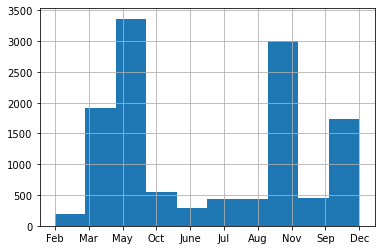

In [7]:
df.month.hist()

<td bgcolor = #7FFFD4> Наибольшее количество событий в марте-мае, ноябре, декабре </td>

In [8]:
table = df.reset_index()

In [60]:
research_list1 = table[['administrative','informational','productrelated']].columns
research_list2 = table[['administrative_duration','informational_duration','productrelated_duration']].columns

1) Посещение страниц типа ADMINISTRATIVE


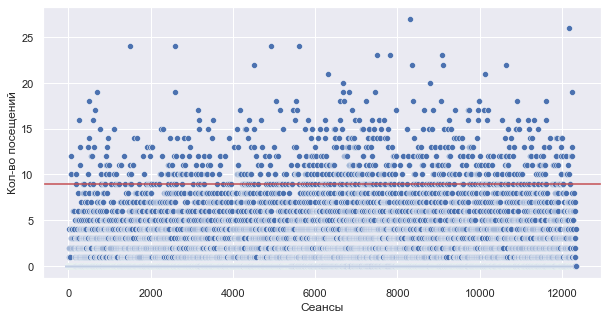



2) Посещение страниц типа INFORMATIONAL


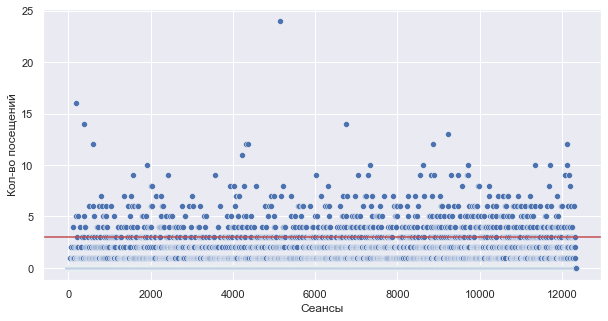



3) Посещение страниц типа PRODUCTRELATED


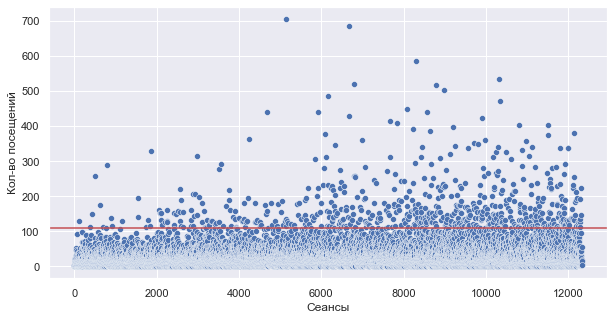

In [99]:
# Визуализация для показателей посещения страниц типа "Administrative", "Informational", "Product Related"

for n,i in enumerate(research_list1,1):
        sns.set(rc={'figure.figsize':(10,5)})
        sns.scatterplot(x='index', y=i, data=table)
        print(str(n)+ ") Посещение страниц типа " + str(i).upper())
        plt.xlabel('Сеансы')
        plt.ylabel('Кол-во посещений')
        m_line = np.percentile(table[i],95)
        plt.axhline(y= m_line, color="r", linestyle="-")
        plt.show()
        print('\n')

<td bgcolor = #7FFFD4> По графикам приведенным выше, видим, что по всей совокупности сеансов страницы типа <b>"Product_Related"</b> посещают чаще остальных </td>

1) Длительность посещения страниц ADMINISTRATIVE_DURATION


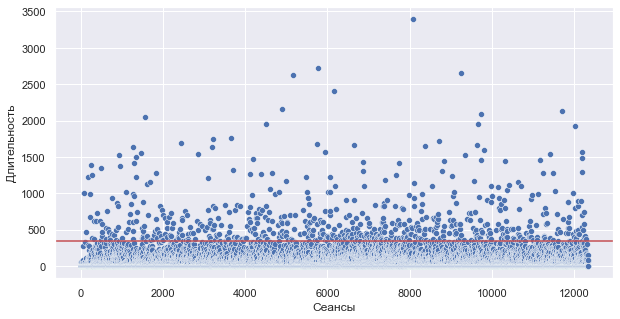



2) Длительность посещения страниц INFORMATIONAL_DURATION


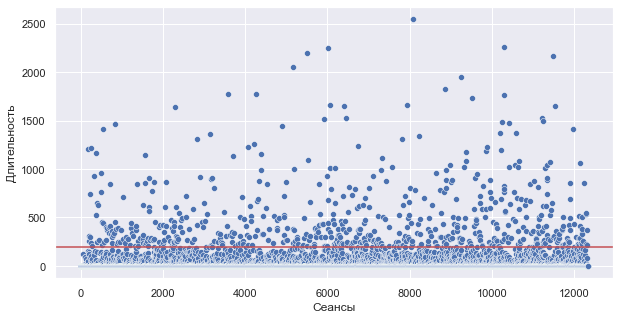



3) Длительность посещения страниц PRODUCTRELATED_DURATION


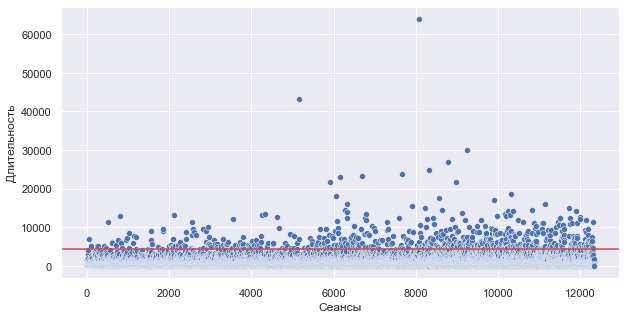

In [100]:
# Визуализация длительности посещения страниц

for n,i in enumerate(research_list2,1):
        sns.set(rc={'figure.figsize':(10,5)})
        sns.scatterplot(x='index', y=i, data=table)
        print(str(n)+ ") Длительность посещения страниц " + str(i).upper())
        plt.xlabel('Сеансы')
        plt.ylabel('Длительность')
        m_line = np.percentile(table[i],95)
        plt.axhline(y= m_line, color="r", linestyle="-")
        plt.show()
        print('\n')

<td bgcolor = #7FFFD4> Посещение страниц типа <b> "Product_Related" </b> по всей совокупности сеансов также превышает по длительности остальные типы страниц </td>

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


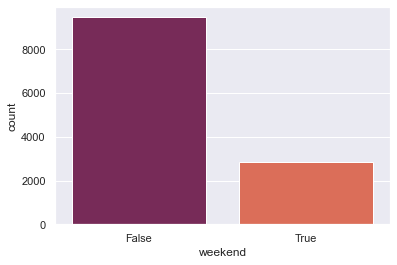

In [111]:
sns.set(rc={'figure.figsize':(6,4)})
sns.countplot(table.weekend, palette='rocket')
plt.show()

<td bgcolor = #7FFFD4> По приведенному выше графику видно, малая часть пользователей посетили сайт в выходные дни </td>

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


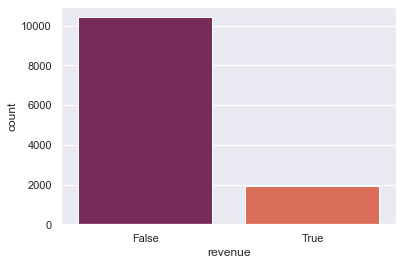

In [114]:
sns.set(rc={'figure.figsize':(6,4)})
sns.countplot(table.revenue, palette='rocket')
plt.show()

<td bgcolor = #7FFFD4> По приведенному выше графику можно утверждать, что немногие посетители сайта совершили покупку </td>

<AxesSubplot:ylabel='browser'>

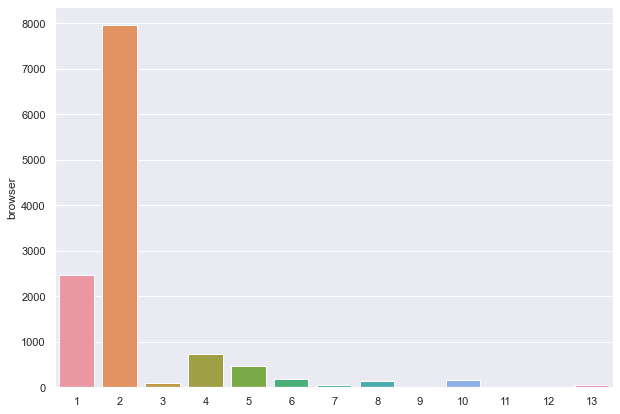

In [156]:
x = table['browser'].value_counts().index
y = table['browser'].value_counts()

sns.set(rc={'figure.figsize':(10,7)})
sns.barplot(x=x, y=y)

<td bgcolor = #7FFFD4> По приведенному выше графику видим, что большинство посетителей сайта используют браузер <b>типа #2</b> </td>

In [116]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [148]:
fig = go.Figure()
pull = [0]*len(table)
fig.add_trace(go.Pie(values=table['operatingsystems'].value_counts(), labels=table['operatingsystems'].value_counts().index, pull=pull, hole=0.5))
fig.show()

<td bgcolor = #7FFFD4> По приведенному выше графику видим, что большинство посетителей сайта используют операционную систему <b>типа #2</b> </td>

In [151]:
import plotly.express as px
fig = go.Figure(data=[go.Pie(labels=table['region'].value_counts().index,
                             values=table['region'].value_counts() ,title='Процент посетителей по регионам')])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<td bgcolor = #7FFFD4> По приведенному выше графику можно утверждать, что большинство посетителей сайта из <b>Региона #1</b> </td>